# **Python Cognitive Computer Vision**
---

## **Computer Vision Image Analysis**
- with Microsoft Azure and Microsoft Cognitive Services
---

# ***ⓞ 전처리***
---

In [116]:
import requests
from io import BytesIO
from PIL import Image

In [117]:
# 필요한 값들을 준비한다.
key = '***********************'                                                             # 키값 ✅
endpoint = 'https://***********************.cognitiveservices.azure.com/'                   # 엔드포인트값 ✅

# 컴퓨터 비전 2.0 버전을 사용할 것이기 때문에 endpoint 뒤에 붙여준다.
endpoint += 'vision/v2.0/'

## ***① Image Analysis***
---

In [118]:
# endpoint로 이미지 분석과, 이미지 감지 작업을 할 수 있다.
analyze_endpoint = endpoint + 'analyze'     # 분석을 위해 끝에 detect를 붙인다.

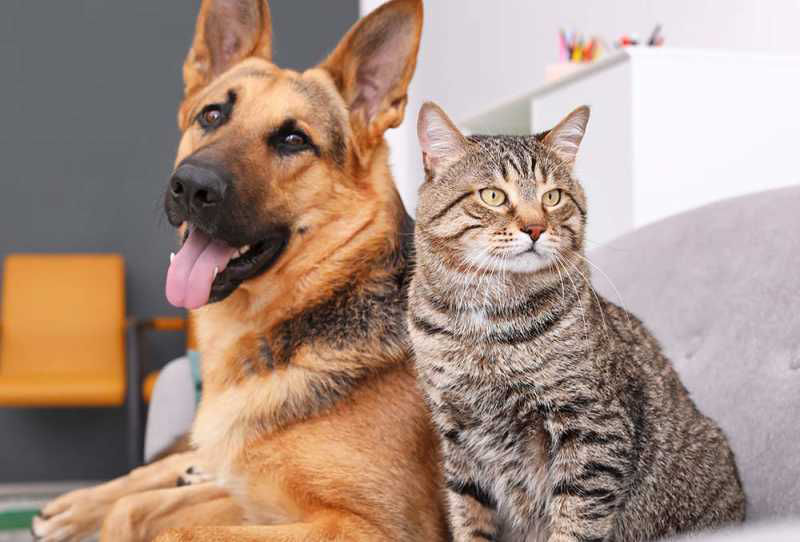

In [119]:
image_url = 'https://images.ctfassets.net/82d3r48zq721/45liwTLsDMSJt4N22RqrHX/cd992f88ca8737f95b085212906d6d86/Can-cats-and-dogs-get-coronavirus_resized.jpg?w=800&q=50'
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [120]:
# 웹 통신할 때는 header, parameter, data 3가지가 필요하다.
header = { 'Ocp-Apim-Subscription-Key' : key }
params = { 'visualFeatures' : 'Categories,Description,Color' }
data = { 'url' : image_url }

In [121]:
# 외부로 요청하기 (클라우드에서 분석 후, 분석값을 가져온다.)
# POST 방식으로 보낸다.
response = requests.post(analyze_endpoint,
                         headers=header,
                         params=params,
                         json=data)

In [122]:
result = response.json()
result    # JSON으로 결과를 출력시킨다.

{'categories': [{'name': 'animal_cat', 'score': 0.99609375}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Grey', 'White'],
  'accentColor': 'A26229',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['sitting',
   'dog',
   'indoor',
   'cat',
   'animal',
   'mammal',
   'brown',
   'front',
   'looking',
   'laying',
   'lying',
   'table',
   'computer',
   'large',
   'standing',
   'laptop',
   'keyboard',
   'living',
   'room',
   'bed'],
  'captions': [{'text': 'a cat sitting next to a dog',
    'confidence': 0.8500182842580905}]},
 'requestId': '42b45b23-7102-4411-9642-cb5286e26b4f',
 'metadata': {'height': 542, 'width': 800, 'format': 'Jpeg'}}

### **특정 내용만 가져오기**
---

In [123]:
# 특정 내용만 가져오기
result['description']     # description 섹션의 내용 가져옥기 (딕셔너리 타입으로 가져오기)

{'tags': ['sitting',
  'dog',
  'indoor',
  'cat',
  'animal',
  'mammal',
  'brown',
  'front',
  'looking',
  'laying',
  'lying',
  'table',
  'computer',
  'large',
  'standing',
  'laptop',
  'keyboard',
  'living',
  'room',
  'bed'],
 'captions': [{'text': 'a cat sitting next to a dog',
   'confidence': 0.8500182842580905}]}

In [124]:
result['description']['captions']     # description 섹션에서 captions 항목 가져오기 (리스트 타입으로 가져오기)

[{'text': 'a cat sitting next to a dog', 'confidence': 0.8500182842580905}]

In [125]:
result['description']['captions'][0]    # [] 괄호가 있으면 인덱스 번호로 내용물을 가져올 수 있다.

{'text': 'a cat sitting next to a dog', 'confidence': 0.8500182842580905}

In [126]:
result['description']['captions'][0]['text']    # {} 괄호가 있으면 키값으로 내용물을 가져올 수 있다.

'a cat sitting next to a dog'

## ***② Objecet Detection***
---

In [127]:
detect_endpoint = endpoint + 'detect'       # 감지를 위해 끝에 detect를 붙인다.

In [128]:
headers = { 'Ocp-Apim-Subscription-Key' : key }
params = {}
data = { 'url': image_url }

In [129]:
response = requests.post(detect_endpoint,    # POST 방식으로 호출한다.
                        headers = headers,
                        params = params,
                        json = data)

In [130]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 14, 'y': 13, 'w': 443, 'h': 527},
   'object': 'German shepherd',
   'confidence': 0.575,
   'parent': {'object': 'dog',
    'confidence': 0.941,
    'parent': {'object': 'mammal',
     'confidence': 0.952,
     'parent': {'object': 'animal', 'confidence': 0.954}}}},
  {'rectangle': {'x': 394, 'y': 89, 'w': 368, 'h': 448},
   'object': 'cat',
   'confidence': 0.914,
   'parent': {'object': 'mammal',
    'confidence': 0.917,
    'parent': {'object': 'animal', 'confidence': 0.917}}}],
 'requestId': '966028a6-e37b-47e8-824c-6bcaa828d833',
 'metadata': {'height': 542, 'width': 800, 'format': 'Jpeg'}}

- analyze는 이미지를 분석만 하는 것이고, detect는 이미지를 분석해서 좌표까지 찍어준다.

In [131]:
result['objects']     # {} 괄호가 있으면 키값으로 내용물을 가져올 수 있다.

[{'rectangle': {'x': 14, 'y': 13, 'w': 443, 'h': 527},
  'object': 'German shepherd',
  'confidence': 0.575,
  'parent': {'object': 'dog',
   'confidence': 0.941,
   'parent': {'object': 'mammal',
    'confidence': 0.952,
    'parent': {'object': 'animal', 'confidence': 0.954}}}},
 {'rectangle': {'x': 394, 'y': 89, 'w': 368, 'h': 448},
  'object': 'cat',
  'confidence': 0.914,
  'parent': {'object': 'mammal',
   'confidence': 0.917,
   'parent': {'object': 'animal', 'confidence': 0.917}}}]

In [132]:
result['objects'][0]     # [] 괄호가 있으면 인덱스 번호로 내용물을 가져올 수 있다.

{'rectangle': {'x': 14, 'y': 13, 'w': 443, 'h': 527},
 'object': 'German shepherd',
 'confidence': 0.575,
 'parent': {'object': 'dog',
  'confidence': 0.941,
  'parent': {'object': 'mammal',
   'confidence': 0.952,
   'parent': {'object': 'animal', 'confidence': 0.954}}}}

In [133]:
print(result['objects'][0]['object'])     # {} 괄호가 있으면 키값으로 내용물을 가져올 수 있다.
print(result['objects'][0]['rectangle'])     # {} 괄호가 있으면 키값으로 내용물을 가져올 수 있다.)

German shepherd
{'x': 14, 'y': 13, 'w': 443, 'h': 527}


### **감지된 영역과 감지된 객체 이름 표시하기**
---

In [134]:
# 감지된 영역에 사각형을 표시하기 위해 필요한 패키지 불러오기
## a x b 크기의 흑백 이미지를 표현하기 위해 필요한 개수 : a x b x 256
## a x b 크기의 컬러 이미지를 표현하기 위해 필요한 개수 : a * b * (256 x 256 x 256)

from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)     # 이미지를 그리기(Draw) 모드로 전환하기

In [135]:
# 'rectangle': {'x': 14, 'y': 13, 'w': 443, 'h': 527} 정보를 이용하여 해당 부분을 사각형으로 그리기
def MakeBox(res):
    objects = res['objects']    # objects를 가져온다.

    # objects 안에 있는 객체의 수 만큼 반복
    for obj in objects:
        rect = obj['rectangle']     # rectangle 키값만 가져오기
        
        # 좌표 정보 출력하기
        print(rect)

        # 좌표 저장하기
        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']

        # (1)
        draw.rectangle(((x, y), (w+x, h+y)), outline='red')     # 빨간색(red) 선으로 사각형 그리기 (튜플 타입으로 (x1, y2)와 (x2, y2)를 넣어준다.) (좌표계는 항상 튜플 타입으로 넣어주어야 한다.)

        # (2) 검출된 객체 이름 표시하기
        objectName = obj['object']
        draw.text((x, y), objectName, fill='red')    # 빨간색(red)으로 객체의 이름을 표시하기
        
        

In [136]:
MakeBox(result)

{'x': 14, 'y': 13, 'w': 443, 'h': 527}
{'x': 394, 'y': 89, 'w': 368, 'h': 448}


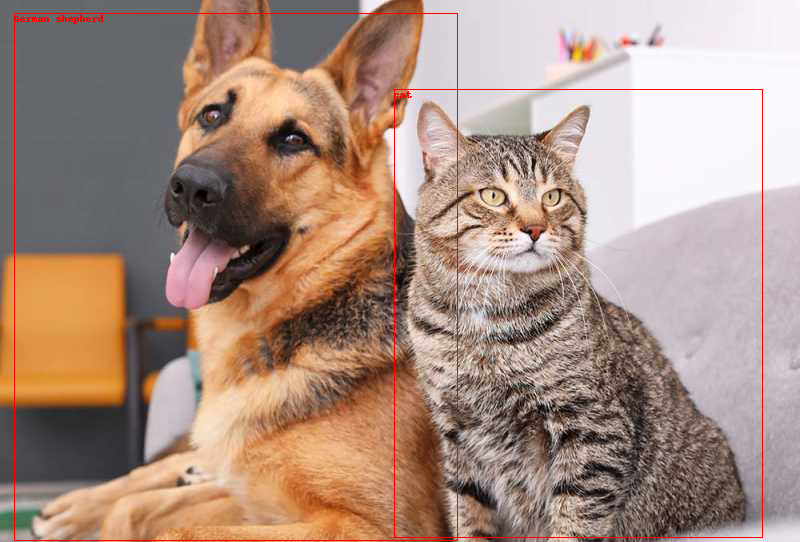

In [137]:
image

## ***③ OCR***
---

In [138]:
ocr_endpoint = endpoint + 'ocr'       # ocr 서비스 이용하기

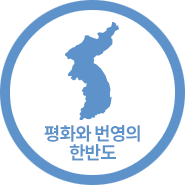

In [139]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"    # 청와대 홈페이지의 이미지
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [140]:
headers = { 'Ocp-Apim-Subscription-Key': key }

params =  { 'language': 'ko','detectOrientation': 'true' }   
# 인식할 언어를 한국어로 설정한다. 잘 모를 경우 'unk'(unknown)으로 쓴다. (auto detect 적용)
# detectOrientation 옵션은 이미지의 방향을 자동으로 인식할 지의 여부를 선택하는 것이다.

data = { 'url': image_url }

In [142]:
response = requests.post(ocr_endpoint,    # POST 방식으로 호출한다.
                        headers = headers,
                        params = params,
                        json = data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [143]:
# regions : 각각의 텍스트가 있는 위치들
# boundingBox : 각각의 텍스트가 있는 구역
result['regions']

[{'boundingBox': '45,125,95,36',
  'lines': [{'boundingBox': '45,125,95,17',
    'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
     {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
   {'boundingBox': '70,144,46,17',
    'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]

In [148]:
# 필요한 데이터 뽑아내기
for reg in result['regions']:
    for line in reg['lines']:         # {} 괄호가 있으면 키값으로 내용물을 가져올 수 있다.
        for word in line['words']:    # {} 괄호가 있으면 키값으로 내용물을 가져올 수 있다.
            print(word['text'])       # 단어만 뽑아내기

평화와
번영의
한반도


In [ ]:
# CV로 할 수 있는 작업중 Face Detection 작업도 있으나, 실습하지 않는다.